Teoría
Explorar notas de formas no supervisadas, con TF-IDF, Cluster, EDA.
Procesamiento clasico para etiquetar entidades con spacy y anotations y codes. (traduccion en ingles)

Topic Maps, agrupar documentos que se refieren a diferentes grupos.
Clustering. Me propone grupos y los nombra referidos a términos relacionados entre si. 
Notas: cardologia, ginecología. 
TF-IDF, palabras no comunes con mas importancia de un tema..

Todos los episodios de urgencias. 
Grupos de urgencias de diferentes servicios
Cluster tienes cardiologia, otro tipo de grupo. Relativos a terminos. Extraer conocimiento implicito de la info. Sleccion de corte de grupos de edad, genero.


Detectar:
Clustering: trabajar palabras, 
Aplicar enfoques semantica, informacion mas potente.

Dependency parsing: nucleo complemento.
Niveles con conceptos info morfologic, semantica.
Analisis sintactico clinico. No hay oraciones claras. 
Terminacion tomia seccionar elimimar. 
Sufijos.



Enfoque de bolsa de palabras. (ignorando semantica) (clasificacion)
Lemmatizacion. Previo. Genero numero MeaningCLoud.
Tokenizo. Stopwords. 
Clasificar. TExto comvertirlo en clasificacion.
Vectorizar. Numeros.cacteristicas. 

IOB sequence labeling. Script sobre fichero. MEter IOB. Excel- Posicion empieza y termina. Posiciones.cuando enpieza y termina una entidad.


##Spacy instalation on colab

In [0]:
"""English SM"""
#!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz

"""Spanish MD"""
!pip3 install https://github.com/explosion/spacy-models/releases/download/es_core_news_md-2.2.5/es_core_news_md-2.2.5.tar.gz

     |████████████████████████████████| 78.4MB 51kB/s 
     |████████████████████████████████| 10.4MB 2.6MB/s 
     |████████████████████████████████| 3.7MB 43.1MB/s 
     |████████████████████████████████| 2.2MB 31.5MB/s 
     |████████████████████████████████| 122kB 55.1MB/s 
  Created wheel for es-core-news-md: filename=es_core_news_md-2.2.5-cp36-none-any.whl size=79649483 sha256=9a452a702b245802ebebb595746f58343c780a65a38f1d53eaea36590f155d12
  Stored in directory: /root/.cache/pip/wheels/b7/bb/a3/29ab5cf80c2c0a8fa0f2af8402fdace3f159e8265f0fdcbcdb
Successfully built es-core-news-md
  Found existing installation: blis 0.2.4
    Uninstalling blis-0.2.4:
      Successfully uninstalled blis-0.2.4
  Found existing installation: preshed 2.0.1
    Uninstalling preshed-2.0.1:
      Successfully uninstalled preshed-2.0.1
  Found existing installation: thinc 7.0.8
    Uninstalling thinc-7.0.8:
      Successfully uninstalled thinc-7.0.8
  Found existing installation: spacy 2.1.9
    Uninstall

Once you have installed Spacy, you need to download some of models that Spacy provides.

You can find the list of available models at 
https://spacy.io/models/es , 
https://spacy.io/models/en and 
https://spacy.io/usage/models

- **en_core_web_md** and **en_core_news_md** includes Vocabulary, POS tags, dependency parse, named entities and word vectors (for obtaining semantic similarity)
- **en_core_web_sm** and **es_core_news_sm**  
- **en_core_web_lg**
- **xx_ent_wiki_sm**. Multi-language

In [0]:
#!python3 -m spacy download es_core_news_md

import spacy
nlp = spacy.load("es_core_news_md")           # load model package https://spacy.io/models/es

OSError: ignored

#Reading Codiesp dataset

When you are developing a NLP system, the first task that you should do is to read the dataset.

So for a NER system, the annotations repreent the entities to recognize. These annotations usually include the text of the entity, the start and end positions within the text and its entity type. On the other hand, the annotations needed for a text classifiction system will be at document level. That is, each document is annotated with its corresponding category.

In this tutorial, we will learn how to load the texts and their annotations to develop a system for recognizing drug names in abstracts.

## Training NER Diagnostics

####Description of the folder Codiesp

These are the train and development sets of the CodiEsp corpus, released in the context of the CodiEsp track for CLEF ehealth 2020.

The CodiEsp corpus contains manually coded clinical cases. All documents are in Spanish language and CIE10 is the coding terminology (it is the Spanish version of ICD10-CM and ICD10-PCS). The CodiEsp corpus has been randomly sampled into three subsets: the train, the development, and the test set. The train set contains 500 clinical cases, and the development and test set 250 clinical cases each. The current version of the corpus does not contain the test set.


**Corpus summary statistics**
The final collection of 1000 clinical cases that make up the corpus had a total of 16504 sentences, with an average of 16.5 sentences per clinical case. It contains a total of 396,988 words, with an average of 396.2 words per clinical case.

For more information, visit the track webpage: http://temu.bsc.es/codiesp/


**Zip structure**
Two folders: dev and train. Each one of them contains the files for the development and train corpora, respectively.
Every folder has 3 TSV files with the annotation information relevant for each of the 3 sub-tracks of CodiEsp. In addition, every folder has a subfolder named "text_files" with the plain text files of the clinical cases.


**Corpus format description**
The CodiEsp corpus is distributed in plain text in UTF8 encoding, where each clinical case is stored as a single file whose name is the clinical case identifier. Annotations are released in a tab-separated file. Since the CodiEsp track has 3 sub-tracks, every set of documents (train and test) has 3 tab-separated files associated with it. 

###Train_dev/train annotations

Inside train, there are 3 folders for any of the 3 sub-tracks with processed data. 

- **train_annotations_codiespD_processed.tsv**
Tab-separated files are: *articleID label ICD10-code text-reference*

- **train_annotations_codiespP_processed.tsv**
Tab-separated files are: *articleID label ICD10-code text-reference*

- **train_annotations_codiespX_processed.tsv**
Tab-separated files are: *articleID label ICD10-code text-reference reference-position* 
(provides the position in the text of the text-reference)

#### train_dev/train/train_annotations_codiespD_processed.tsv

In [0]:
ls

drive/  sample_data/


In [0]:
path_codiesp='drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp/'


"""Columns: articleID \t label \t ICD10-code \t text-reference"""
file_annotationsD = path_codiesp + 'train_dev/train/train_annotations_codiespD_processed.tsv'
annotationsD = open(file_annotationsD)

#for text in annotationsD:
  #print(text)

FileNotFoundError: ignored

####Dataframe annotationsD

In [0]:
df_annotationsD = pd.read_csv(file_annotationsD, 
                  sep='\t', 
                  names=["ArticleID", "Label", "ICD10-code", "Text-reference"])

df_annotationsD.head()

,ArticleID,Label,ICD10-code,Text-reference
0,S0004-06142005000700014-1,DIAGNOSTICO,e04.9 (automatic suggestion),bocio
1,S0004-06142005000700014-1,DIAGNOSTICO,a23.9,Brucella
2,S0004-06142005000700014-1,DIAGNOSTICO,a23.9,Brucella
3,S0004-06142005000700014-1,DIAGNOSTICO,r50.9,febril
4,S0004-06142005000700014-1,DIAGNOSTICO,r52,dolores


###Train_dev/train  text_files (case study) 

Inside train, there are "text_files" with the plain text files of the clinical cases.

- **Sxxxx-xxxxxxxxxxxxxxxxx-x.txt** represents different clinical cases.


The final collection of 1000 clinical cases that make up the corpus had a total of 16504 sentences, with an average of 16.5 sentences per clinical case. It contains a total of 396,988 words, with an average of 396.2 words per clinical case.



#### train_dev/train/Sxxxx-xxxxxxxxxxxxxxxxx-x.txt
- **S0004-06142005000700014-1.txt**. text1
- **S0004-06142005000900013-1.txt**. text2
- **S0004-06142005000900015-1.txt**. text3

####Dataframe text_files

In [0]:
path_codiesp='drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp/'

text_file1 = path_codiesp + 'train_dev/train/text_files/S0004-06142005000700014-1.txt'
text_file2 = path_codiesp + 'train_dev/train/text_files/S0004-06142005000900013-1.txt'
text_file3 = path_codiesp + 'train_dev/train/text_files/S0004-06142005000900015-1.txt'

text1 = open(text_file1).read()
print(text1)

text2 = open(text_file2).read()
print(text2)

text3 = open(text_file3).read()
print(text3)


FileNotFoundError: ignored

In [0]:
ls


In [0]:
cd 'drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp/train_dev/train/text_files'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp/train_dev/train/text_files'
/content/drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp


In [0]:
cd './train_dev/train/text_files'

/content/drive/My Drive/Colab Notebooks/3. Codiesp/Codiesp/train_dev/train/text_files


In [0]:
text_file_list = !ls
print(type(text_file_list))
print(text_file_list)

<class 'IPython.utils.text.SList'>
['S0004-06142005000700014-1.txt  S0378-48352006000600006-1.txt', 'S0004-06142005000900013-1.txt  S0378-48352006000900006-1.txt', 'S0004-06142005000900015-1.txt  S0465-546X2008000200010-1.txt', 'S0004-06142005001000011-3.txt  S0465-546X2009000300008-1.txt', 'S0004-06142005001000016-1.txt  S0465-546X2011000300007-1.txt', 'S0004-06142006000100014-1.txt  S0465-546X2014000300010-1.txt', 'S0004-06142006000200001-1.txt  S1130-01082004001200010-1.txt', 'S0004-06142006000200013-1.txt  S1130-01082005001000014-1.txt', 'S0004-06142006000200014-1.txt  S1130-01082005001200011-1.txt', 'S0004-06142006000300015-1.txt  S1130-01082005001200013-1.txt', 'S0004-06142006000500002-2.txt  S1130-01082006000100014-1.txt', 'S0004-06142006000500011-1.txt  S1130-01082006000700014-1.txt', 'S0004-06142006000600009-1.txt  S1130-01082007000300006-7.txt', 'S0004-06142006000600012-1.txt  S1130-01082007000400015-1.txt', 'S0004-06142006000700013-1.txt  S1130-01082007000600012-1.txt', 'S00

In [0]:
# Create the pandas DataFrame 
df = pd.DataFrame(talks_url, columns = ['Nombre', 'URL']) 
  
# print dataframe. 
df['Nombre'] = df['Nombre'].apply(lambda x: x.replace('\n', ''))
df['URL'] = df['URL'].apply(url_transcript)

In [0]:
#df_text_files = pd.DataFrame(text_file1, columns=["Name-text-file", "Clinical-text"])
df_text_files = pd.DataFrame(text_file1, columns=["Clinical-text"])
df_text_files.head()

ValueError: ignored

###Codiesp_codes

Tab-separated files with 3 columns: *code	es-description	en-description*

There are 2 types, depending of sub-track.
 
 - **codiesp-D_codes.tsv**: list of CIE10-Diagnósticos terms (2018 version) with their description in Spanish and in English.
Spanish to English description mapping: For CodiEsp-D, the mapping to the English description was done through the files in the National Center for Health Statistics webpage: https://www.cdc.gov/nchs/icd/icd10cm.htm
Specifically, the file used was: ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Publications/ICD10CM/2018/2018-ICD-10-CM-Codes-File.zip/icd10cm_codes_2018.txt

 - **codiesp-P_codes.tsv**: list of CIE10-Procedimiento terms (2018 version) with their description in Spanish and in English. In addition, the list also contains the codes until the 4th axis, which are also used in the CodiEsp-P track due to annotation reasons.
Spanish to English description mapping: For CodiEsp-P, the mapping to the English description was done through the files in the Centers for Medicare Services webpage: https://www.cms.gov/Medicare/Coding/ICD10/2018-ICD-10-PCS-and-GEMs
Specifically, the file used was: 2018_icd10pcs_codes_file.zip/icd10pcs_codes_2018.txt

A limited number of codes do not have English description because they were removed from the English version but maintained in the Spanish version of the terminology.

#### Codiesp_codes/codiesp-D_codes.tsv

In [0]:
"""Columns: code \t es-description \t en-description"""

file_codeD = path_codiesp +'codiesp_codes/codiesp-D_codes.tsv'
#codeD = open(file_codeD)

#for text in codeD:
  #print(text)

#### Dataframe codesD

In [0]:
x = df[]
c = []
for i in x:
  c.append()

In [0]:
df_codesD = pd.read_csv(file_codeD, 
                  sep='\t', 
                  names=["Code", "Es-description", "En-description"])

#df_codesD.describe
#max min perceptil count...

df_codesD.head()

,Code,Es-description,En-description
0,A00.0,"Cólera debido a Vibrio cholerae 01, biotipo ch...","Cholera due to Vibrio cholerae 01, biovar chol..."
1,A00.1,"Cólera debido a Vibrio cholerae 01, biotipo El...","Cholera due to Vibrio cholerae 01, biovar eltor"
2,A00.9,"Cólera, no especificado","Cholera, unspecified"
3,A01.00,"Fiebre tifoidea, no especificada","Typhoid fever, unspecified"
4,A01.01,Meningitis tifoidea,Typhoid meningitis


In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents

text1 = "Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha. La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin soplos, roces ni extratonos. Auscultación pulmonar con conservación del murmullo vesicular. Abdomen blando, depresible, sin masas ni megalias. En la exploración neurológica no se detectan signos meníngeos ni datos de focalidad. Extremidades sin varices ni edemas. Pulsos periféricos presentes y simétricos. En la exploración urológica se aprecia el teste derecho aumentado de tamaño, no adherido a piel, con zonas de fluctuación e intensamente doloroso a la palpación, con pérdida del límite epidídimo-testicular y transiluminación positiva. Los datos analíticos muestran los siguentes resultados: Hemograma: Hb 13,7 g/dl; leucocitos 14.610/mm3 (neutrófilos 77%); plaquetas 206.000/ mm3. VSG: 40 mm 1ª hora. Coagulación: TQ 87%; TTPA 25,8 seg. Bioquímica: Glucosa 117 mg/dl; urea 29 mg/dl; creatinina 0,9 mg/dl; sodio 136 mEq/l; potasio 3,6 mEq/l; GOT 11 U/l; GPT 24 U/l; GGT 34 U/l; fosfatasa alcalina 136 U/l; calcio 8,3 mg/dl. Orina: sedimento normal. Durante el ingreso se solicitan Hemocultivos: positivo para Brucella y Serologías específicas para Brucella: Rosa de Bengala +++; Test de Coombs > 1/1280; Brucellacapt > 1/5120. Las pruebas de imagen solicitadas ( Rx tórax, Ecografía abdominal, TAC craneal, Ecocardiograma transtorácico) no evidencian patología significativa, excepto la Ecografía testicular, que muestra engrosamiento de la bolsa escrotal con pequeña cantidad de líquido con septos y testículo aumentado de tamaño con pequeñas zonas hipoecoicas en su interior que pueden representar microabscesos. Con el diagnóstico de orquiepididimitis secundaria a Brucella se instaura tratamiento sintomático (antitérmicos, antiinflamatorios, reposo y elevación testicular) así como tratamiento antibiótico específico: Doxiciclina 100 mg vía oral cada 12 horas (durante 6 semanas) y Estreptomicina 1 gramo intramuscular cada 24 horas (durante 3 semanas). El paciente mejora significativamente de su cuadro tras una semana de ingreso, decidiéndose el alta a su domicilio donde completó la pauta de tratamiento antibiótico. En revisiones sucesivas en consultas se constató la completa remisión del cuadro."        
text2 = "Varón de 36 años, sin antecedentes de interés, que fue estudiado en la consulta de medicina interna por presentar masa inguinoescrotal izquierda dolorosa a la palpación de dos meses de evolución, sin pérdida de peso ni síndrome miccional. A la exploración, los testes eran de tamaño y consistencia normales, con un cordón espermático izquierdo indurado y muy doloroso. La ecografía testicular fue normal. La CT de abdomen-pelvis reveló masa de 6 x 3 centímetros en el trayecto del cordón espermático izquierdo sin objetivarse imágenes de afectación retroperitoneal. Con el diagnóstico de tumor paratesticular izquierdo fue intervenido, encontrándose una masa en cordón espermático y realizándose biopsia intraoperatoria informada como proliferación neoplásica de aspecto miofibroblástico no linfomatosa, por lo que se realizó orquiectomía radical izquierda reglada. La anatomía patológica fue de rabdomiosarcoma pleomórfico del cordón espermático, teste y epidídimo normales y negatividad de los márgenes de resección. Posteriormente el paciente ha recibido varios ciclos de quimioterapia con adriamicina e ifosfamida + MESNA. En las pruebas de imagen de control a los cuatro meses de la cirugía, no se objetivan recidivas tumorales."       
#text3 = "Se trata de una mujer de 29 años sometida a un estudio ecográfico pélvico de control tras una ligadura de trompas por vía laparoscópica. Durante el mismo se detectó una tumoración de 20 mm en la cara lateral derecha de la vejiga, bien delimitada e hipoecoica. La paciente no presentaba sintomatología miccional, como refirió en el interrogatorio posterior. Se le realizó una urografía intravenosa, en la cual no se detectó ninguna alteración del aparato urinario superior. En el cistograma de la misma se puso de manifiesto un defecto de repleción redondeado y de superficie lisa, localizado en la pared vesical derecha. Las analíticas de sangre y orina estaban dentro de los límites normales. Se le realizó una cistoscopia a la paciente, donde se objetivó la presencia de una tumoración a modo de "joroba", de superficie lisa y mucosa conservada, en cara lateral derecha de vejiga, inmediatamente por encima y delante del meato ureteral ipsilateral. Con el diagnóstico de presunción de leiomioma vesical se practicó resección transuretral de la tumoración. Los fragmentos resecados tenían un aspecto blanquecino, sólido y compacto, parecidos a los de un adenoma prostático, con escaso sangrado. El material obtenido de la resección transuretral estaba formado por una proliferación de células fusiformes de citoplasma alargado, al igual que el núcleo, y ligeramente eosinófilo. No se apreciaron mitosis ni atipias. El estudio inmunohistoquímico demostró la positividad para actina músculo específica (DAKO, clon HHF35 ) en las células proliferantes. A los tres meses de la resección transuretral se realizó cistoscopia de control, observando una placa calcárea sobreelevada sobre el área de resección previa, compatible con cistopatía incrustante que se trató mediante resección transuretral de ésta y de restos leiomiomatosos y acidificación urinaria posterior."
texts = [text1, text2]

print(texts)

"""modelo clustering dbscan (scikitlearn) hdbscan jerarquico"""

['Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha. La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin sopl

'modelo clustering dbscan (scikitlearn) hdbscan jerarquico'

In [0]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(texts)
# summarize
print(vectorizer.vocabulary_)
print('Tamaño del vocabulario:',len(vectorizer.vocabulary_))

# encode document

{'describimos': 102, 'el': 118, 'caso': 68, 'de': 96, 'un': 340, 'varón': 348, '37': 18, 'años': 50, 'con': 79, 'vida': 352, 'previa': 266, 'activa': 28, 'que': 273, 'refiere': 282, 'dolores': 107, 'osteoarticulares': 238, 'localización': 194, 'variable': 345, 'en': 120, 'último': 359, 'mes': 207, 'fiebre': 149, 'la': 188, 'última': 357, 'semana': 302, 'picos': 253, 'matutino': 201, 'vespertino': 351, '40': 19, 'las': 189, 'últimas': 358, '24': 13, '48': 20, 'horas': 168, 'por': 257, 'lo': 193, 'acude': 29, 'al': 34, 'servicio': 306, 'urgencias': 343, 'antes': 40, 'comenzar': 75, 'cuadro': 92, 'estuvo': 137, 'extremadura': 145, 'una': 341, 'región': 283, 'endémica': 123, 'brucella': 57, 'ingiriendo': 174, 'leche': 190, 'cabra': 62, 'sin': 312, 'pasteurizar': 244, 'queso': 274, 'dicho': 105, 'ganado': 155, 'entre': 125, 'los': 195, 'comensales': 74, 'aparecieron': 44, 'varios': 347, 'casos': 69, 'brucelosis': 59, 'durante': 114, 'ingreso': 175, 'para': 242, 'estudio': 136, 'del': 98, 's

2 herramienta de anotación linrerias de anotacion.
prodigy y docano

In [0]:
data = pd.read_csv(text_file2, sep=" ", header=None)
data.columns = ["a", "b"]

stemming nombres
lematizacion verbos

stopword añadimos lemma
pos tagging
si es vero añadir lema
si es nombre añado steming

nombres adjetivos y verbos
stemmirs  brutos

vio un stemmer es v


##Wordcloud

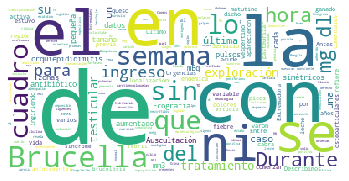

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(text1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

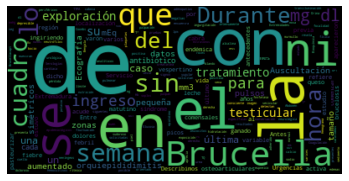

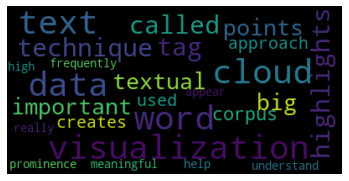

In [0]:

# Generate a word cloud image
wordcloud = WordCloud().generate(text1)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
if token.pos ==noun

filtrado capturar dependencias

pos dependecy parsing
es input para

pos va antes que dependency parsing. clasificacion multiclase, a nivel de token.
token, pos 
output dependency parsing
sujeto nominal...

juan juega a la pelota. capturar relaciones. 
herramientas que filtran de cara a featurizar.

featurizacion/vectorizacion (no todo son vectores, listas com orden que importa)
bag of words (conjunto de términos)

In [0]:

from wordcloud import WordCloud
text = '''A word cloud (also called tag cloud) is a data visualization technique which highlights the important textual data points from a big text corpus. The approach used creates a meaningful visualization of text which could really help to understand high prominence of words that appear more frequently. '''
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: ignored

In [0]:
!pip3 install stylecloud
import stylecloudstylecloud.gen_stylecloud(file_path = "2009-01-20-inaugural-address.txt")

stylecloud.gen_stylecloud(file_path = "2009-01-20-inaugural-address.txt", icon_name= "fab fa-twitter")
stylecloud.gen_stylecloud(file_path = "2009-01-20-inaugural-address.txt", icon_name= "fab fa-twitter", palette="cartocolors.diverging.TealRose_7", background_color="black")

SyntaxError: ignored

##Vectorization

bag of words

1 hot encoder

input en vector para cada termino

word embedings


nsive bayes (tf idf). Input son los terminos

In [0]:
for text in texts:
  vector = vectorizer.transform([text])
  # summarize encoded vector
  #print(vector.shape)
  #print(type(vectors))
  print(text,vector.toarray())


Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha. La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin soplos

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(texts)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'describimos': 102, 'el': 118, 'caso': 68, 'de': 96, 'un': 340, 'varón': 348, '37': 18, 'años': 50, 'con': 79, 'vida': 352, 'previa': 266, 'activa': 28, 'que': 273, 'refiere': 282, 'dolores': 107, 'osteoarticulares': 238, 'localización': 194, 'variable': 345, 'en': 120, 'último': 359, 'mes': 207, 'fiebre': 149, 'la': 188, 'última': 357, 'semana': 302, 'picos': 253, 'matutino': 201, 'vespertino': 351, '40': 19, 'las': 189, 'últimas': 358, '24': 13, '48': 20, 'horas': 168, 'por': 257, 'lo': 193, 'acude': 29, 'al': 34, 'servicio': 306, 'urgencias': 343, 'antes': 40, 'comenzar': 75, 'cuadro': 92, 'estuvo': 137, 'extremadura': 145, 'una': 341, 'región': 283, 'endémica': 123, 'brucella': 57, 'ingiriendo': 174, 'leche': 190, 'cabra': 62, 'sin': 312, 'pasteurizar': 244, 'queso': 274, 'dicho': 105, 'ganado': 155, 'entre': 125, 'los': 195, 'comensales': 74, 'aparecieron': 44, 'varios': 347, 'casos': 69, 'brucelosis': 59, 'durante': 114, 'ingreso': 175, 'para': 242, 'estudio': 136, 'del': 98, 's

In [0]:
for text in texts:
  vector = vectorizer.transform([text])
  # summarize encoded vector
  #print(vector.shape)
  #print(type(vectors))
  print(text,vector.toarray())

Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha. La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin soplos

no suoervisados
se comprueban con casos parecidos

Golden standar es un corupus en un dominio parecido 

evalualtor 
gensim
coherence vs perplexity


ingenuo no hay dependencia

naive bayes funciona bien para deteccion de spam. no necesita capturar relacion entre los terminos.


Evaluate Topic Models: Latent Dirichlet Allocation (LDA)


neural coreference
https://huggingface.co/coref/
github 
NOrmalizacion: coreferencias, anaforas

ner vs pos
pos es indepenciente del contexto, gramatical
ner en contexto concreto
coreferencias
dependenci parsing: 

preprocesar
sin puntuacion ni stopword. (hacer, )
steming lemmarizing, adv, nom, verbos, adj.


destilar informacion de palabars

transformacion en numero, entrenar clasificador.


featurizar tf idf, o frecuencias

representar texto
eneagramas

entrenar clasificador de spam.







#Exploracion

Supervisado
max distribucion estado latente.

NO supervisados (que esta suervisando)
Types of topic modelling (no suervisados, tienes que interpretar un output que tienes que interpretar) (identificar entidades)
NNF with gensim
LDA (aproximar dirichlet 2 parametros)
LSA (descomponer en componentes principales) Aproximar dos matrices terminos, documentos, diferencia.

Clasificacion (NER)
Reconocimiento de intenciones (clasificiacion
Analisis sentimiento (regresion clasificacion)
Extraccion info (no sup)
Extracion de relaciones (no sup)

super deep, recurrentes, 
transformer
nn aplica 


Extraer corpus
Preprocesado
Explorar terminos mas frecuentes, 
Clasificacion

modelos lineales
no lineales 


visualizador de topic modelling es menos eficiente que el 
binding gensim (no funciona)

visualizar topic models 
problema de carga, no de optimiza.

entrenar tarda meos
la visualizacion reduce dimensialidad, se tira 1 h.

Libreria de gensim visualizacion topic modeling
pyLDAvis 2.1.2
como de apelatonados estan los topics.




Gensim
LDA y LDA multicore

hyph , -, 

tokenizer
modelo ya entrenado english con datos en ingles
usa conocimiento estadistico.

https://github.com/explosion/spaCy/blob/master/spacy/lang/es/tokenizer_exceptions.py

https://github.com/explosion/spaCy/blob/master/spacy/lang/lex_attrs.py

Problema de NLP nos referimos a ello (problema). SI haces stopwords, y hay problemas de disembiguar.

neuralcoref (co referencias)
.
.
.
.
.
.
.
.

https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/

# eliminando stopwords


In [0]:
#tokens = [token.text for token in docs[0] if not token.is_stop]
tokens = [token.text for token in text1 if not token.is_stop]

AttributeError: ignored

In [0]:
print(type(text1))

<class 'str'>


In [0]:
print(docs[0])

crecí para estudiar el cerebro porque tengo un hermano que fue diagnosticado con un trastorno cerebral: esquizofrenia. y como hermana y más tarde, como científica, quería entender por qué puedo abstraer mis sueños, puedo conectarlos a mi realidad y hacerlos realidad. ¿qué sucede con el cerebro de mi hermano y su esquizofrenia que no puede conectar sus sueños con una realidad común y compartida sino que se vuelven delirios? 


In [0]:
print(tokens)

['crecí', 'estudiar', 'cerebro', 'hermano', 'diagnosticado', 'trastorno', 'cerebral', ':', 'esquizofrenia', '.', 'y', 'hermana', 'y', ',', 'científica', ',', 'quería', 'entender', 'abstraer', 'sueños', ',', 'conectarlos', 'a', 'realidad', 'y', 'hacerlos', 'realidad', '.', '¿', 'sucede', 'cerebro', 'hermano', 'y', 'esquizofrenia', 'conectar', 'sueños', 'realidad', 'común', 'y', 'compartida', 'vuelven', 'delirios', '?']


#Count vectorizer


In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents

text1 = "Describimos el caso de un varón de 37 años con vida previa activa que refiere dolores osteoarticulares de localización variable en el último mes y fiebre en la última semana con picos (matutino y vespertino) de 40 C las últimas 24-48 horas, por lo que acude al Servicio de Urgencias. Antes de comenzar el cuadro estuvo en Extremadura en una región endémica de brucella, ingiriendo leche de cabra sin pasteurizar y queso de dicho ganado. Entre los comensales aparecieron varios casos de brucelosis. Durante el ingreso para estudio del síndrome febril con antecedentes epidemiológicos de posible exposición a Brucella presenta un cuadro de orquiepididimitis derecha. La exploración física revela: Tª 40,2 C; T.A: 109/68 mmHg; Fc: 105 lpm. Se encuentra consciente, orientado, sudoroso, eupneico, con buen estado de nutrición e hidratación. En cabeza y cuello no se palpan adenopatías, ni bocio ni ingurgitación de vena yugular, con pulsos carotídeos simétricos. Auscultación cardíaca rítmica, sin soplos, roces ni extratonos. Auscultación pulmonar con conservación del murmullo vesicular. Abdomen blando, depresible, sin masas ni megalias. En la exploración neurológica no se detectan signos meníngeos ni datos de focalidad. Extremidades sin varices ni edemas. Pulsos periféricos presentes y simétricos. En la exploración urológica se aprecia el teste derecho aumentado de tamaño, no adherido a piel, con zonas de fluctuación e intensamente doloroso a la palpación, con pérdida del límite epidídimo-testicular y transiluminación positiva. Los datos analíticos muestran los siguentes resultados: Hemograma: Hb 13,7 g/dl; leucocitos 14.610/mm3 (neutrófilos 77%); plaquetas 206.000/ mm3. VSG: 40 mm 1ª hora. Coagulación: TQ 87%; TTPA 25,8 seg. Bioquímica: Glucosa 117 mg/dl; urea 29 mg/dl; creatinina 0,9 mg/dl; sodio 136 mEq/l; potasio 3,6 mEq/l; GOT 11 U/l; GPT 24 U/l; GGT 34 U/l; fosfatasa alcalina 136 U/l; calcio 8,3 mg/dl. Orina: sedimento normal. Durante el ingreso se solicitan Hemocultivos: positivo para Brucella y Serologías específicas para Brucella: Rosa de Bengala +++; Test de Coombs > 1/1280; Brucellacapt > 1/5120. Las pruebas de imagen solicitadas ( Rx tórax, Ecografía abdominal, TAC craneal, Ecocardiograma transtorácico) no evidencian patología significativa, excepto la Ecografía testicular, que muestra engrosamiento de la bolsa escrotal con pequeña cantidad de líquido con septos y testículo aumentado de tamaño con pequeñas zonas hipoecoicas en su interior que pueden representar microabscesos. Con el diagnóstico de orquiepididimitis secundaria a Brucella se instaura tratamiento sintomático (antitérmicos, antiinflamatorios, reposo y elevación testicular) así como tratamiento antibiótico específico: Doxiciclina 100 mg vía oral cada 12 horas (durante 6 semanas) y Estreptomicina 1 gramo intramuscular cada 24 horas (durante 3 semanas). El paciente mejora significativamente de su cuadro tras una semana de ingreso, decidiéndose el alta a su domicilio donde completó la pauta de tratamiento antibiótico. En revisiones sucesivas en consultas se constató la completa remisión del cuadro."        
text2 = "Varón de 36 años, sin antecedentes de interés, que fue estudiado en la consulta de medicina interna por presentar masa inguinoescrotal izquierda dolorosa a la palpación de dos meses de evolución, sin pérdida de peso ni síndrome miccional. A la exploración, los testes eran de tamaño y consistencia normales, con un cordón espermático izquierdo indurado y muy doloroso. La ecografía testicular fue normal. La CT de abdomen-pelvis reveló masa de 6 x 3 centímetros en el trayecto del cordón espermático izquierdo sin objetivarse imágenes de afectación retroperitoneal. Con el diagnóstico de tumor paratesticular izquierdo fue intervenido, encontrándose una masa en cordón espermático y realizándose biopsia intraoperatoria informada como proliferación neoplásica de aspecto miofibroblástico no linfomatosa, por lo que se realizó orquiectomía radical izquierda reglada. La anatomía patológica fue de rabdomiosarcoma pleomórfico del cordón espermático, teste y epidídimo normales y negatividad de los márgenes de resección. Posteriormente el paciente ha recibido varios ciclos de quimioterapia con adriamicina e ifosfamida + MESNA. En las pruebas de imagen de control a los cuatro meses de la cirugía, no se objetivan recidivas tumorales."       
#text3 = "Se trata de una mujer de 29 años sometida a un estudio ecográfico pélvico de control tras una ligadura de trompas por vía laparoscópica. Durante el mismo se detectó una tumoración de 20 mm en la cara lateral derecha de la vejiga, bien delimitada e hipoecoica. La paciente no presentaba sintomatología miccional, como refirió en el interrogatorio posterior. Se le realizó una urografía intravenosa, en la cual no se detectó ninguna alteración del aparato urinario superior. En el cistograma de la misma se puso de manifiesto un defecto de repleción redondeado y de superficie lisa, localizado en la pared vesical derecha. Las analíticas de sangre y orina estaban dentro de los límites normales. Se le realizó una cistoscopia a la paciente, donde se objetivó la presencia de una tumoración a modo de "joroba", de superficie lisa y mucosa conservada, en cara lateral derecha de vejiga, inmediatamente por encima y delante del meato ureteral ipsilateral. Con el diagnóstico de presunción de leiomioma vesical se practicó resección transuretral de la tumoración. Los fragmentos resecados tenían un aspecto blanquecino, sólido y compacto, parecidos a los de un adenoma prostático, con escaso sangrado. El material obtenido de la resección transuretral estaba formado por una proliferación de células fusiformes de citoplasma alargado, al igual que el núcleo, y ligeramente eosinófilo. No se apreciaron mitosis ni atipias. El estudio inmunohistoquímico demostró la positividad para actina músculo específica (DAKO, clon HHF35 ) en las células proliferantes. A los tres meses de la resección transuretral se realizó cistoscopia de control, observando una placa calcárea sobreelevada sobre el área de resección previa, compatible con cistopatía incrustante que se trató mediante resección transuretral de ésta y de restos leiomiomatosos y acidificación urinaria posterior."
texts = [text1, text2]

print(texts)

"""modelo clustering dbscan (scikitlearn) hdbscan jerarquico"""

In [0]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(texts)
# summarize
print(vectorizer.vocabulary_)
print('Tamaño del vocabulario:',len(vectorizer.vocabulary_))

# encode document